In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piwavelet as wavelet
import pylab
import matplotlib.image as mpimg

In [2]:
nb_vol='122'

In [3]:
url1 = "C:\\Users\\polin\\Documents\\IMT\\Mission R&D\\Data_Synchro\\Vol_"+nb_vol+"\\vol_"+ nb_vol +"_Synchro.txt"

In [4]:
data = pd.read_csv(url1, sep=',', engine='python')

In [5]:
data

,Time(s),p1_Oxy1,p1_Oxy2,p2_Oxy1,p2_Oxy2,p1_Dxy1,p1_Dxy2,p2_Dxy1,p2_Dxy2
0,0.0,-4.533400e-07,-6.869467e-08,-6.086874e-07,3.215988e-07,-8.738994e-08,9.359138e-08,7.151455e-07,2.297992e-07
1,0.1,-4.679091e-07,-5.476886e-08,-6.172763e-07,3.244848e-07,-7.811741e-08,1.099544e-07,7.257950e-07,2.327516e-07
2,0.2,-4.827490e-07,-4.129265e-08,-6.254526e-07,3.282258e-07,-6.868408e-08,1.263369e-07,7.366170e-07,2.359498e-07
3,0.3,-4.978459e-07,-2.829734e-08,-6.331931e-07,3.328433e-07,-5.909457e-08,1.427182e-07,7.476084e-07,2.393977e-07
4,0.4,-5.131851e-07,-1.581321e-08,-6.404750e-07,3.383573e-07,-4.935371e-08,1.590778e-07,7.587656e-07,2.430982e-07
...,...,...,...,...,...,...,...,...,...
18541,1854.1,2.299846e-07,-1.467024e-08,4.506527e-07,2.450882e-06,3.534781e-08,-4.881986e-08,-1.380312e-07,7.514582e-07
18542,1854.2,2.184995e-07,-1.328030e-08,4.276378e-07,2.316649e-06,3.253270e-08,-4.741434e-08,-1.306379e-07,7.080386e-07
18543,1854.3,2.069798e-07,-1.163103e-08,4.040960e-07,2.178513e-06,2.972749e-08,-4.587196e-08,-1.230351e-07,6.630550e-07
18544,1854.4,1.954228e-07,-9.748020e-09,3.800641e-07,2.036854e-06,2.693975e-08,-4.419285e-08,-1.152415e-07,6.166760e-07


In [6]:
p1_Oxy_mean=(data['p1_Oxy1']+data[' p1_Oxy2'])/2
p2_Oxy_mean=(data[' p2_Oxy1']+data[' p2_Oxy2'])/2
data.insert(3, "p1_Oxy_mean", p1_Oxy_mean)
data.insert(6, "p2_Oxy_mean", p2_Oxy_mean)

In [ ]:
vol = pd.DataFrame(columns=[])
nbCombi = 0
#On veut le calcul des différentes combinaisons
for j in range (1, 4):
    y1 = data[data.columns[j]]
    for l in range (4, 7):
        y2 = data[data.columns[l]]
        #Wavelet Coherence
        y1 = (y1-y1.mean())/y1.std() #Normalization of the Signal 1
        y2 = (y2-y2.mean())/y2.std() #Normalization of the Signal 2
        myCoherence = wavelet.wcoherence(y1,y2) #Wavelet Coherence Analysis
        Rsq,period,scale,coi,sig95=myCoherence() # If you want to know the individual properties

        #On retire les valeurs dans le cône
        for i in range (len(coi)):
            triangle = coi[i]
            index = 0
            if triangle <= period[len(period)-1]:
                if triangle <= period[0]:
                    index = 0
                else:
                    while period[index] <= triangle: #ça suffit ça
                        index +=1
                for k in range (index, len(Rsq)):
                    Rsq[k,i] = np.nan
#Filtre les fréquences
        period2 = period/10
        frequence = 1/period2 #faire qu'une ligne
        index=[]
        for freq in frequence:
            if freq<=0.15 and freq >= 0.015: #inverser conditions
                index.append(list(frequence).index(freq))
        new = Rsq[index[0]:index[len(index)-1],:]
#Moyenne rsq par colonne pour avoir le score par seconde
        column_mean = np.nanmean(new, axis=0)
        vol.insert(nbCombi, nbCombi, column_mean)
        nbCombi +=1
            
vol.columns = ['p1_Oxy1 / p2_Oxy1', 'p1_Oxy1 / p2_Oxy2', 'p1_Oxy1 / p2_OxyMEAN', 'p1_Oxy2 / p2_Oxy1', 'p1_Oxy2 / p2_Oxy2', 'p1_Oxy2 / p2_OxyMEAN', 'p1_OxyMEAN / p2_Oxy1', 'p1_OxyMEAN / p2_Oxy2', 'p1_OxyMEAN / p2_OxyMEAN']
vol.insert(0,"Time(s)",data['Time(s)'])

    wtcsignif at line 44 column 10
    wtc at line 146 column 11
    _pyeval at line 57 column 30



In [ ]:
data_sec = vol
data_sec=data_sec.groupby(data_sec.index // 10).mean()
data_sec['Time(s)'] = round(data_sec['Time(s)'])+1
data_15_sec=data_sec
for i in range(data_sec.shape[0]-14):
    data_15_sec.loc[i]=data_sec.loc[i:i+14].mean()
data_15_sec.drop(data_15_sec.tail(14).index, inplace = True)
#Changer en fonction de l'utilisateur 
data_15_sec.to_csv('C:/Users/polin/Documents/IMT/Mission R&D/wavelette/vol' + nb_vol + '.csv', index=False)

In [4]:
#Changer en fonction de l'utilisateur 
vol = pd.read_csv("C:/Users/polin/Documents/IMT/Mission R&D/CSV/vol"+nb_vol+".csv")

In [5]:
vol=vol.dropna()
vol=vol.reset_index()

In [ ]:
#Faire la fênetre de 15 secondes aprés la wavelette (comme dans l'article de référence 
vol_copie=vol.copy()
for i in range(vol.shape[0]-14):
    vol.loc[i]=vol_copie.loc[i:i+14].mean()
vol.drop(vol.tail(14).index, inplace = True)
time=list(range(15,vol.shape[0]+15))
vol.insert(0, "Time",time)
vol=vol.drop(columns=["index"])
vol=vol.set_index('Time')

In [6]:
vol=vol.rename(columns={"p1_Oxy1 / p2_Oxy1": "p1_Oxy1_p2_Oxy1", "p1_Oxy1 / p2_Oxy2": "p1_Oxy1_p2_Oxy2", "p1_Oxy1 / p2_OxyMEAN": "p1_Oxy1_p2_mean", "p1_Oxy2 / p2_Oxy1": "p1_Oxy2_p2_Oxy1", "p1_Oxy2 / p2_Oxy2": "p1_Oxy2_p2_Oxy2", "p1_Oxy2 / p2_OxyMEAN": "p1_Oxy2_p2_mean",  "p1_OxyMEAN / p2_Oxy1": "p1_mean_p2_Oxy1", "p1_OxyMEAN / p2_Oxy2": "p1_mean_p2_Oxy1", "p1_OxyMEAN / p2_Oxy2": "p1_mean_p2_Oxy2", "p1_OxyMEAN / p2_OxyMEAN": "p1_mean_p2_mean"})



In [8]:
np.c_[vol['p1_Oxy1_p2_Oxy1'].values, vol['p1_Oxy2_p2_Oxy2'].values, vol['p1_Oxy2_p2_Oxy1'].values, vol['p1_Oxy2_p2_Oxy2'].values, vol['p1_Oxy1_p2_mean'].values]

array([[0.59957625, 0.18911692, 0.46609883, 0.18911692, 0.48589441],
       [0.59573961, 0.18587962, 0.46099383, 0.18587962, 0.48264112],
       [0.5918331 , 0.18265041, 0.45586019, 0.18265041, 0.47933567],
       ...,
       [0.34647335, 0.66866021, 0.15825298, 0.66866021, 0.30155458],
       [0.34919134, 0.66694423, 0.1622591 , 0.66694423, 0.30059948],
       [0.35186585, 0.6651656 , 0.16624681, 0.6651656 , 0.2995936 ]])

C:\Users\polin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


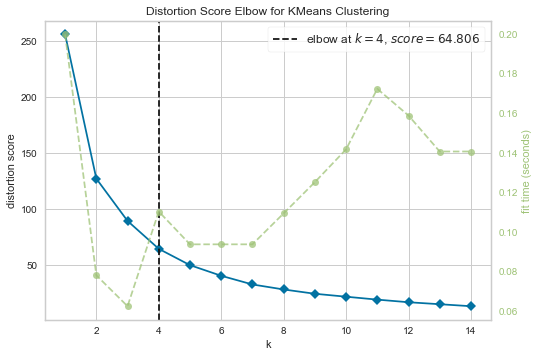

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
concat=np.c_[vol['p1_Oxy1_p2_Oxy1'].values, vol['p1_Oxy1_p2_Oxy2'].values, vol['p1_Oxy1_p2_mean'].values, vol['p1_Oxy2_p2_Oxy1'].values, vol['p1_Oxy2_p2_Oxy2'].values, vol['p1_Oxy2_p2_mean'].values, vol['p1_mean_p2_Oxy1'].values, vol['p1_mean_p2_Oxy2'].values, vol['p1_mean_p2_mean'].values]
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,15))
visualizer.fit(concat)
visualizer.show()

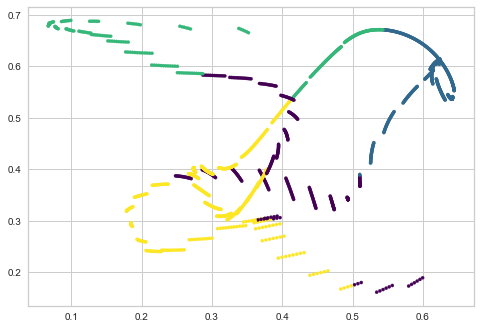

In [10]:
kmeans = KMeans(4) #changer pour chaque vol
clust=kmeans.fit_predict(concat)
#Pour visualiser : 
#plt.scatter(vol['p1_Oxy1_p2_Oxy1'].values, vol['p1_Oxy2_p2_Oxy2'].values,c=clust,s=10, cmap='viridis')

In [11]:
cluster_map = vol.copy()
cluster_map['cluster'] = kmeans.labels_
cluster_map

,index,p1_Oxy1_p2_Oxy1,p1_Oxy1_p2_Oxy2,p1_Oxy1_p2_mean,p1_Oxy2_p2_Oxy1,p1_Oxy2_p2_Oxy2,p1_Oxy2_p2_mean,p1_mean_p2_Oxy1,p1_mean_p2_Oxy2,p1_mean_p2_mean,cluster
0,96,0.599576,0.327028,0.485894,0.466099,0.189117,0.338729,0.539438,0.238068,0.405137,0
1,97,0.595740,0.324830,0.482641,0.460994,0.185880,0.334174,0.534717,0.234926,0.400875,0
2,98,0.591833,0.322603,0.479336,0.455860,0.182650,0.329609,0.529946,0.231777,0.396583,0
3,99,0.587857,0.320350,0.475979,0.450699,0.179430,0.325036,0.525127,0.228619,0.392261,0
4,100,0.583811,0.318070,0.472570,0.445510,0.176220,0.320455,0.520258,0.225456,0.387912,0
...,...,...,...,...,...,...,...,...,...,...,...
1644,1740,0.340909,0.575201,0.303307,0.150192,0.671903,0.459926,0.227216,0.656333,0.384408,2
1645,1741,0.343712,0.574190,0.302457,0.154230,0.670313,0.457563,0.231002,0.654776,0.382680,2
1646,1742,0.346473,0.573114,0.301555,0.158253,0.668660,0.455194,0.234745,0.653160,0.380928,2
1647,1743,0.349191,0.571973,0.300599,0.162259,0.666944,0.452820,0.238445,0.651486,0.379152,2


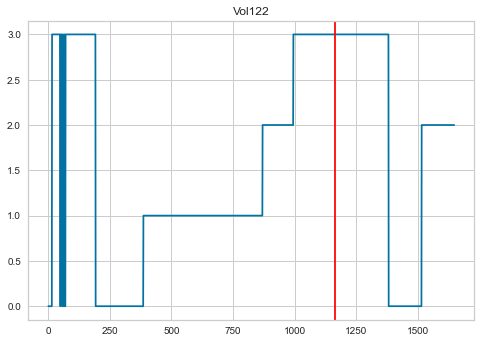

In [12]:
heure_ancident = pd.read_excel("C:/Users/polin/Documents/IMT/Mission R&D/Incident + Heure.xlsx")
heure_ancident=heure_ancident[heure_ancident['Numéro vol']==int(nb_vol)]
heure_ancident['Time'].values.tolist()

plt.plot(cluster_map.index.values.tolist(), cluster_map['cluster'].values.tolist())
for i in heure_ancident['Time'].values:
    plt.axvline(i, color='red')
    
plt.title('Vol'+nb_vol)
#Changer en fonction de l'utilisateur 
plt.savefig('C:/Users/polin/Documents/IMT/Mission R&D/clusters+incidents/clust_' + nb_vol + '.png')
plt.show()

In [13]:
centers = kmeans.cluster_centers_
centers

array([[0.40496819, 0.32677012, 0.36120026, 0.43602731, 0.406231  ,
        0.44566393, 0.44257732, 0.38372892, 0.41905299],
       [0.60422297, 0.58256859, 0.52983406, 0.51723637, 0.57389124,
        0.48707644, 0.55541754, 0.57451045, 0.49314351],
       [0.31950357, 0.49498008, 0.34509547, 0.27615213, 0.64144838,
        0.46391441, 0.25768863, 0.58403873, 0.37826325],
       [0.30800022, 0.33167204, 0.26264546, 0.29330681, 0.3537012 ,
        0.27823725, 0.2650761 , 0.31713411, 0.21273354]])

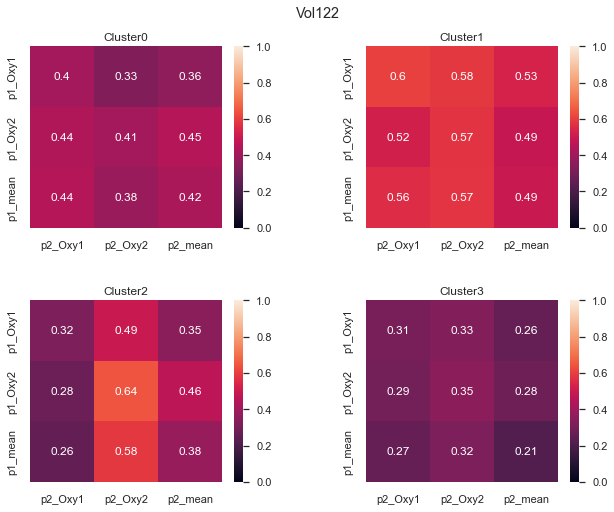

In [14]:
import seaborn as sns
sns.set_theme()
centers = kmeans.cluster_centers_
figure = plt.figure()
j=len(centers)//2
w=len(centers)-j
for i in range(len(centers)):
    center_map=[centers[i][:3],centers[i][3:6], centers[i][6:]]
    plt.subplot(2,w,i+1)
    sns.heatmap(center_map, annot=True, vmax=1, vmin=0, xticklabels=['p2_Oxy1', 'p2_Oxy2', 'p2_mean'], yticklabels=['p1_Oxy1', 'p1_Oxy2', 'p1_mean'])
    plt.title("Cluster"+str(i))
plt.subplots_adjust(left=0.1,bottom=0.1, right=1.1, top=1.2, wspace=0.4, hspace=0.4)
figure = plt.gcf()
figure.suptitle('Vol'+nb_vol, y=1.3, x=0.6)
#Changer en fonction de l'utilisateur 
plt.savefig('C:/Users/polin/Documents/IMT/Mission R&D/heatmap/heatmap_' + nb_vol + '.png', bbox_inches='tight')
plt.show()